In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

# from yellowbrick.cluster import KElbowVisualizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
def tokenize(string):
    """Cleans and tokenizes a string and returns a list of strings that are in
    VOCABULARY"""
    words_in_string = clean_str(string)
    return [word for word in words_in_string if word in VOCABULARY]

In [3]:
def find_best_num_clusters(matrix, cluster_range):
    clusters_errors = []
    for n in cluster_range:
        km = KMeans(n_clusters=n, n_jobs=-1)
        km.fit(matrix)
        clusters_errors.append((n, km.inertia_))
        print('Complete for {} clusters...'.format(n))
    return clusters_errors

In [4]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
with open('/Users/scott/p4/pickles/vocabulary.pkl', 'rb') as f:
    VOCABULARY = pickle.load(f)

In [6]:
with open('/Users/scott/p4/pickles/vectorizer_tfidf_NMF_20.pkl', 'rb') as f:
    tf = pickle.load(f)

with open('/Users/scott/p4/pickles/doc_topic_tfidf_NMF_20.pkl', 'rb') as f:
    word_vec_reduced = pickle.load(f)

with open('/Users/scott/p4/pickles/model_tfidf_NMF_20.pkl', 'rb') as f:
    nmf = pickle.load(f)

In [7]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
print(type(nmf))
print(type(tf))
print(type(word_vec_reduced))

<class 'sklearn.decomposition.nmf.NMF'>
<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
<class 'numpy.ndarray'>


Complete for 1 clusters...
Complete for 2 clusters...
Complete for 3 clusters...
Complete for 4 clusters...
Complete for 5 clusters...
Complete for 6 clusters...
Complete for 7 clusters...
Complete for 8 clusters...
Complete for 9 clusters...
Complete for 10 clusters...
Complete for 11 clusters...
Complete for 12 clusters...
Complete for 13 clusters...
Complete for 14 clusters...
Complete for 15 clusters...
Complete for 16 clusters...
Complete for 17 clusters...
Complete for 18 clusters...
Complete for 19 clusters...
Complete for 20 clusters...
Complete for 21 clusters...
Complete for 22 clusters...
Complete for 23 clusters...
Complete for 24 clusters...
Complete for 25 clusters...
Complete for 26 clusters...
Complete for 27 clusters...
Complete for 28 clusters...
Complete for 29 clusters...
Complete for 30 clusters...
Complete for 31 clusters...
Complete for 32 clusters...
Complete for 33 clusters...
Complete for 34 clusters...
Complete for 35 clusters...
Complete for 36 clusters...
C

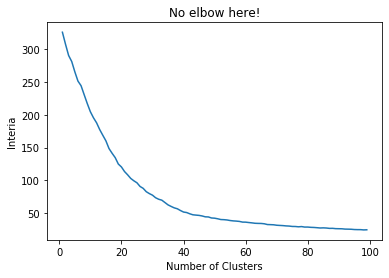

In [14]:
vec = nmf.components_

nc = range(1,100)
errors = find_best_num_clusters(word_vec_reduced, nc)

e1 = [x[1] for x in errors]


plt.title('No elbow here!');
plt.xlabel('Number of Clusters');
plt.ylabel('Interia');
plt.plot(nc, e1);
plt.savefig('../images/no_elbow_here.png')

In [10]:
e1

[240.88876262397704,
 230.13243483170805,
 216.638979574999,
 207.98975011130676,
 200.08742415201044,
 186.67440380142696,
 176.32795469976386]

In [11]:
word_vec_reduced.shape

(111240, 20)